<a href="https://colab.research.google.com/github/macforanalysis/opengl-tutorial-colab/blob/master/tutorial02_red_triangle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is based on the following URL:
http://www.opengl-tutorial.org/beginners-tutorials/tutorial-2-the-first-triangle/

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!pip install -q lucid>=0.2.3

In [0]:
from lucid.misc.gl.glcontext import create_opengl_context
import OpenGL.GL as gl
import OpenGL.GLU as glu
import OpenGL.GL.shaders as shaders

WIDTH, HEIGHT = 1024, 768

create_opengl_context((WIDTH, HEIGHT))

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR))
print(gl.glGetString(gl.GL_SHADING_LANGUAGE_VERSION))
print(gl.glGetString(gl.GL_RENDERER))

b'4.6.0 NVIDIA 418.67'
b'NVIDIA Corporation'
b'4.60 NVIDIA'
b'Tesla K80/PCIe/SSE2'


In [0]:
# Dark blue background
gl.glClearColor(0., 0., 0.4, 0.)

In [0]:
vertex_array_id = gl.glGenVertexArrays(1)
gl.glBindVertexArray(vertex_array_id)

In [0]:
VERTEX_SHADER = """
#version 330 core

// Input vertex data, different for all executions of this shader.
layout(location = 0) in vec3 vertexPosition_modelspace;

void main(){

    gl_Position.xyz = vertexPosition_modelspace;
    gl_Position.w = 1.0;

}
"""

In [0]:
FRAGMENT_SHADER = """
#version 330 core

// Ouput data
out vec3 color;

void main()
{

        // Output color = red 
        color = vec3(1,0,0);

}
"""

In [0]:
vert_shader = shaders.compileShader(VERTEX_SHADER, gl.GL_VERTEX_SHADER)
frag_shader = shaders.compileShader(FRAGMENT_SHADER, gl.GL_FRAGMENT_SHADER)
program_id = shaders.compileProgram(vert_shader, frag_shader)

In [0]:
g_vertex_buffer_data = np.array([
                                 -1.0, -1.0, 0.0,
                                 1.0, -1.0, 0.0,
                                 0.0, 1.0, 0.0,
], dtype=np.float32)

In [0]:
vertex_buffer = gl.glGenBuffers(1)
gl.glBindBuffer(gl.GL_ARRAY_BUFFER, vertex_buffer)
gl.glBufferData(gl.GL_ARRAY_BUFFER, g_vertex_buffer_data, gl.GL_STATIC_DRAW)

In [0]:
# clear the screen
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

# use our shader
gl.glUseProgram(program_id)

# 1st attribute buffer : vertices
gl.glEnableVertexAttribArray(0)
gl.glBindBuffer(gl.GL_ARRAY_BUFFER, vertex_buffer)
gl.glVertexAttribPointer(
    0,
    3,
    gl.GL_FLOAT,
    gl.GL_FALSE,
    0,
    None
)

# Draw the triangle
gl.glDrawArrays(gl.GL_TRIANGLES, 0, 3)

gl.glDisableVertexAttribArray(0)

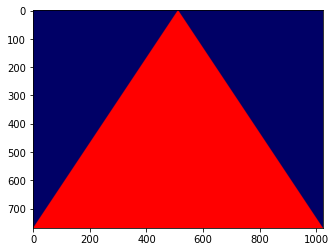

In [0]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
plt.imshow(img)